In [1]:
from pyspark.sql import SparkSession, functions as F
from pyspark.sql.functions import *

# Cell to create a spark session
spark = (
    SparkSession.builder.appName("MAST30034 ASSIGNMENT 1 DUSTIN")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.executor.memory", "2g")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

22/08/20 15:19:50 WARN Utils: Your hostname, DESKTOP-3ADPNV0 resolves to a loopback address: 127.0.1.1; using 172.25.27.161 instead (on interface eth0)
22/08/20 15:19:50 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/20 15:19:52 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/08/20 15:19:54 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
#cell for all imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from matplotlib import *


In [3]:
# cell to load the aggregated data

yellow_sample = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/yellow_sample')
aggregate_date = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_date')
aggregate_weekday = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_weekday')
aggregate_weekend = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_weekend')
aggregate_win = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_win')
aggregate_lose = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_lose')
aggregate_start = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_start')
aggregate_PU = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_PU')
aggregate_DO = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_DO')

In [4]:
yellow_sample

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,day_of_week,is_weekend,trip_length,Date,Start(ET),Attendance,Win,margin_victory/loss
0,2018-12-25 10:29:03,2018-12-25 10:31:40,0.63,100,48,4.0,0.96,5.76,Tue,False,2.6167,2018-12-25,12:00,19812,No,-14
1,2018-12-25 17:38:54,2018-12-25 17:42:43,1.10,237,236,5.5,1.58,7.88,Tue,False,3.8167,2018-12-25,12:00,19812,No,-14
2,2018-12-25 00:02:37,2018-12-25 00:13:44,1.61,100,229,9.0,2.06,12.36,Tue,False,11.1167,2018-12-25,12:00,19812,No,-14
3,2018-12-25 00:48:10,2018-12-25 00:53:35,1.20,163,50,6.0,1.45,8.75,Tue,False,5.4167,2018-12-25,12:00,19812,No,-14
4,2018-12-25 00:29:09,2018-12-25 00:46:08,3.80,239,137,14.5,3.15,18.95,Tue,False,16.9833,2018-12-25,12:00,19812,No,-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641210,2019-02-24 22:59:22,2019-02-24 23:10:47,2.06,79,186,10.0,2.76,16.56,Sun,True,11.4167,2019-02-24,19:30,18019,Yes,12
641211,2019-02-24 23:23:06,2019-02-24 23:39:21,4.80,138,146,17.0,3.65,21.95,Sun,True,16.2500,2019-02-24,19:30,18019,Yes,12
641212,2019-02-24 23:25:11,2019-02-24 23:37:34,2.58,230,238,11.5,3.06,18.36,Sun,True,12.3833,2019-02-24,19:30,18019,Yes,12
641213,2019-02-24 23:27:48,2019-02-24 23:39:06,4.28,164,74,13.5,4.32,21.62,Sun,True,11.3000,2019-02-24,19:30,18019,Yes,12


In [5]:
corr_cols = ["trip_distance", "fare_amount", "tip_amount", "total_amount", "trip_length", "Attendance", "margin_victory/loss"]

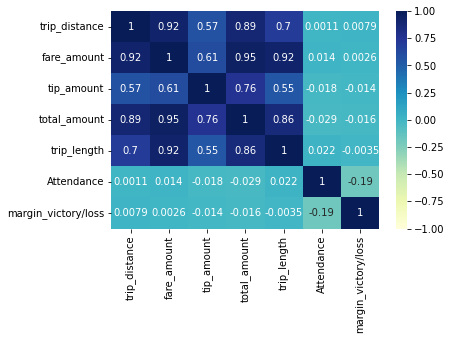

In [6]:
correlation_matrix = sns.heatmap(yellow_sample[corr_cols].corr(), cmap="YlGnBu", annot=True, vmin= -1, vmax=1)

In [7]:
# Editted the correlation matrix and save it

correlation_matrix.set_xticklabels(correlation_matrix.get_xticklabels(), rotation = 60, horizontalalignment='right')
figure_correlation = correlation_matrix.get_figure()
figure_correlation.set_size_inches(12, 11)
figure_correlation.savefig('../../mast30034-project-1-dustintano10/plots/correlation_matrix.jpeg', dpi=400)

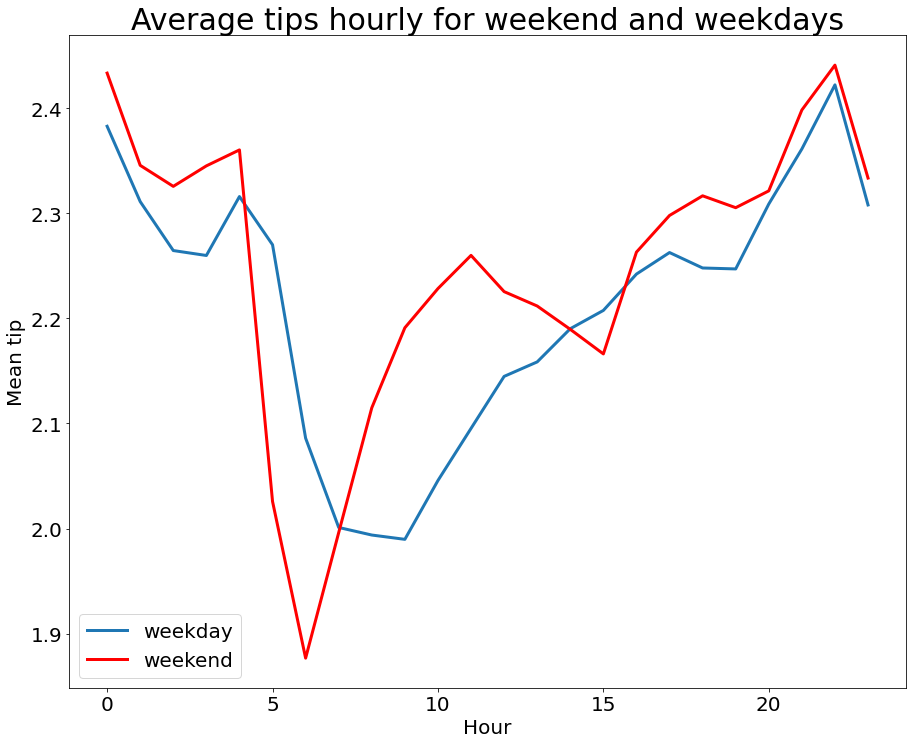

In [8]:
# plot the time series plot for weekend vs weekday hourly

plt.figure(figsize=(15, 12))


plt.plot(aggregate_weekday.hour, aggregate_weekday.mean_tip, label='weekday', 
         linewidth=3)
plt.plot(aggregate_weekend.hour, aggregate_weekend.mean_tip, color='red', 
         label='weekend', linewidth=3)

plt.title('Average tips hourly for weekend and weekdays', fontsize=30)

plt.xlabel('Hour', fontsize=20)

plt.ylabel('Mean tip', fontsize=20)

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.legend(fontsize = 20)

plt.savefig('../../mast30034-project-1-dustintano10/plots/time_series_plot_weekday_weekend.jpeg')

plt.show()


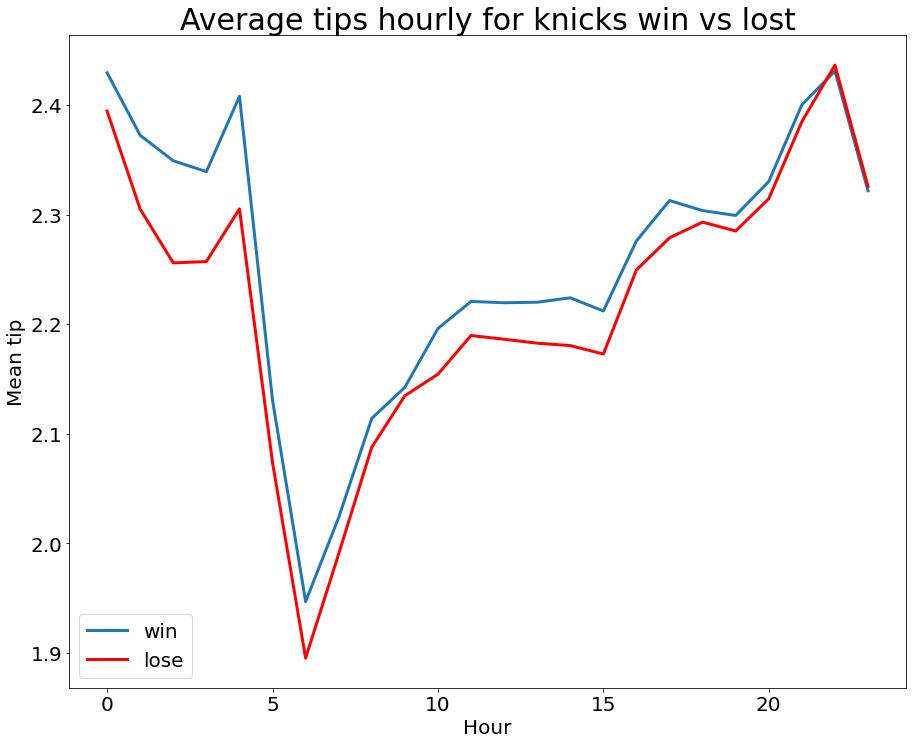

In [9]:
# plotted time series plot when knicks win vs when knicks lose hourly

plt.figure(figsize=(15, 12))


plt.plot(aggregate_win.hour, aggregate_win.mean_tip, label='win', 
         linewidth=3)
plt.plot(aggregate_lose.hour, aggregate_lose.mean_tip, color='red', 
         label='lose', linewidth=3)

plt.title('Average tips hourly for knicks win vs lost', fontsize=30)

plt.xlabel('Hour', fontsize=20)

plt.ylabel('Mean tip', fontsize=20)

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.legend(fontsize = 20)

plt.savefig('../../mast30034-project-1-dustintano10/plots/time_series_plot_win_lost.jpeg')

plt.show()


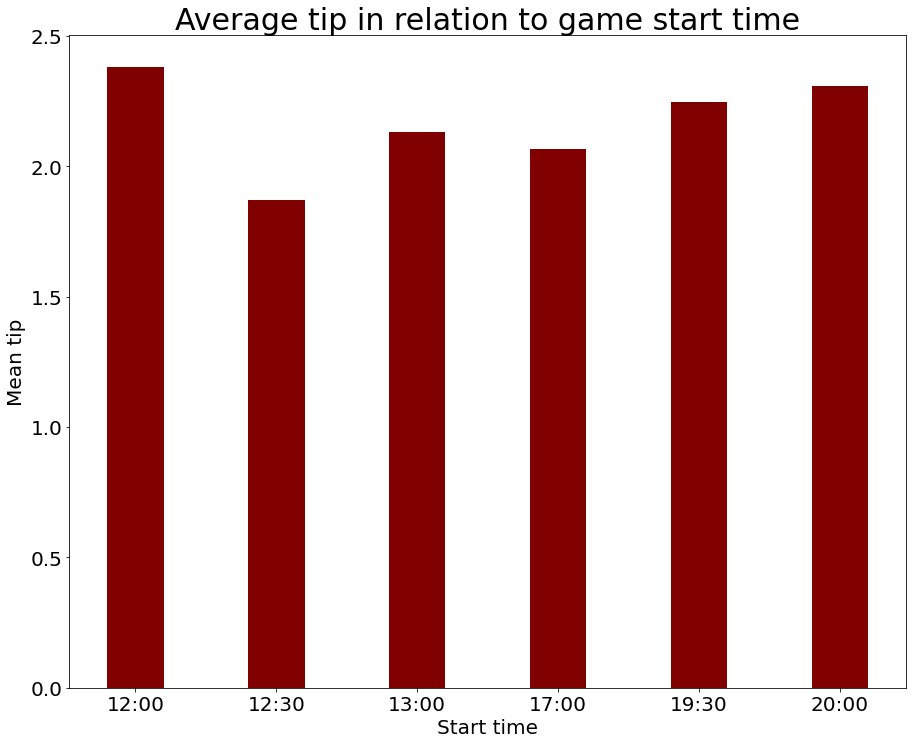

In [10]:
# plotted a barplot for average tips depending on the time the game starts

plt.figure(figsize=(15, 12))

plt.bar(aggregate_start.start_time, aggregate_start.mean_tip, color ='maroon',
        width = 0.4)
 
plt.xlabel("Start time", fontsize=20)

plt.ylabel("Mean tip", fontsize=20)

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.title("Average tip in relation to game start time", fontsize=30)

plt.savefig('../../mast30034-project-1-dustintano10/plots/bar_plot_gamestart.jpeg')

plt.show()

In [11]:
# code from Tute2_Python

# load shapefile and zones
# sf stands for shape file
sf = gpd.read_file("../../mast30034-project-1-dustintano10/data/taxi_zones/taxi_zones.shp")
zones = pd.read_csv("../../mast30034-project-1-dustintano10/data/taxi_zones/taxi+_zone_lookup.csv")

sf.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."


In [12]:
# code from Tute2_Python

# Convert the geometry shaape to to latitude and longitude
# Please attribute this if you are using it
sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
sf.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."


In [13]:
# code from Tute2_Python

# merges the shape file with the zones file
gdf = gpd.GeoDataFrame(
    pd.merge(zones, sf, on='LocationID', how='inner')
)

gdf.head()

,LocationID,Borough,Zone,service_zone,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
0,1,EWR,Newark Airport,EWR,1,0.116357,0.000782,Newark Airport,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,2,Queens,Jamaica Bay,Boro Zone,2,0.433470,0.004866,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,3,0.084341,0.000314,Allerton/Pelham Gardens,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,4,Manhattan,Alphabet City,Yellow Zone,4,0.043567,0.000112,Alphabet City,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,5,Staten Island,Arden Heights,Boro Zone,5,0.092146,0.000498,Arden Heights,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."


In [14]:
# created a gdf for manhattan only as we are only focusing on manhattan for the geospatial analysis

gdf_manhattan = gdf[gdf["Borough"] == "Manhattan"]

In [15]:
# created a geoJSON for the manhattan gdf

geoJSON_manhattan = gdf_manhattan[['LocationID', 'geometry']].drop_duplicates('LocationID').to_json()


In [16]:
# merge the gdf with the aggregated_PU (aggregate by pickup location)


aggregate_PU_manhattan =  aggregate_PU \
    .merge(gdf_manhattan[['LocationID', 'Borough', 'Zone', 'geometry']], left_on='Pickup_location', right_on='LocationID') \
    .drop('LocationID', axis=1) \
    .sort_values(by = ['mean_tip'], ascending = False)

aggregate_PU_manhattan.head()

,Pickup_location,mean_tip,Borough,Zone,geometry
44,194,3.7090,Manhattan,Randalls Island,"POLYGON ((-73.91640 40.79768, -73.91545 40.797..."
15,88,3.1707,Manhattan,Financial District South,"POLYGON ((-74.00975 40.70478, -74.00945 40.704..."
1,12,3.1406,Manhattan,Battery Park,"POLYGON ((-74.01566 40.70483, -74.01540 40.704..."
14,87,2.9230,Manhattan,Financial District North,"POLYGON ((-74.00372 40.70693, -74.00361 40.706..."
63,261,2.9117,Manhattan,World Trade Center,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."


In [17]:
# plot the aggregate by pickup location

m = folium.Map(location=[40.79, -73.90], tiles="Stamen Terrain", zoom_start=10)
c = folium.Choropleth(
    geo_data=geoJSON_manhattan, # geoJSON 
    name='choropleth', # name of plot
    data=aggregate_PU_manhattan.reset_index(), # data source
    columns=['Pickup_location','mean_tip'], # the columns required
    key_on='properties.LocationID', # this is from the geoJSON's properties
    fill_color='YlOrRd', # color scheme
    nan_fill_color='black',
    legend_name='Mean Tips USD$'
)

c.add_to(m)

m

In [18]:
# merge the gdf with the aggregated_DO (aggregate by dropoff location)

aggregate_DO_manhattan =  aggregate_DO \
    .merge(gdf_manhattan[['LocationID','Borough', 'Zone', 'geometry']], left_on='Dropoff_location', right_on='LocationID') \
    .drop('LocationID', axis=1) \
    .sort_values(by = ['mean_tip'], ascending = False)

aggregate_DO_manhattan.head()

,Dropoff_location,mean_tip,Borough,Zone,geometry
59,243,4.0678,Manhattan,Washington Heights North,"POLYGON ((-73.93157 40.86958, -73.93141 40.868..."
25,128,3.8943,Manhattan,Inwood Hill Park,"MULTIPOLYGON (((-73.92360 40.87890, -73.92362 ..."
24,127,3.8613,Manhattan,Inwood,"MULTIPOLYGON (((-73.91122 40.87303, -73.91119 ..."
45,202,3.7834,Manhattan,Roosevelt Island,"POLYGON ((-73.94180 40.76905, -73.94257 40.768..."
44,194,3.6893,Manhattan,Randalls Island,"POLYGON ((-73.91640 40.79768, -73.91545 40.797..."


In [19]:
# plot the aggregate by dropoff location

m_2 = folium.Map(location=[40.79, -73.90], tiles="Stamen Terrain", zoom_start=10)
c_2 = folium.Choropleth(
    geo_data=geoJSON_manhattan, # geoJSON 
    name='choropleth', # name of plot
    data=aggregate_DO_manhattan.reset_index(), # data source
    columns=['Dropoff_location','mean_tip'], # the columns required
    key_on='properties.LocationID', # this is from the geoJSON's properties
    fill_color='YlOrRd', # color scheme
    nan_fill_color='black',
    legend_name='Mean Tips USD$'
)

c_2.add_to(m_2)

m_2

In [20]:
# created a marker for top earning location in manhattan for pickup tip

aggregate_PU_manhattan['centroid'] = aggregate_PU_manhattan['geometry'].apply(lambda x: (x.centroid.y, x.centroid.x))


folium.Marker(
       location=aggregate_PU_manhattan.iloc[0]['centroid'],
       popup=aggregate_PU_manhattan.iloc[0]['Zone'],
    ).add_to(m)

m

In [21]:
# created a marker for top earning location in manhattan for dropoff tip

aggregate_DO_manhattan['centroid'] = aggregate_DO_manhattan['geometry'].apply(lambda x: (x.centroid.y, x.centroid.x))


folium.Marker(
       location=aggregate_DO_manhattan.iloc[0]['centroid'],
       popup=aggregate_DO_manhattan.iloc[0]['Zone'],
    ).add_to(m_2)



m_2